#Installing & Importing Libraries

In [1]:
# !pip install git+https://github.com/alok-ai-lab/pyDeepInsight

In [2]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 24.0 MB/s 


In [3]:
!pip install git+https://github.com/alok-ai-lab/pyDeepInsight.git#egg=pyDeepInsight

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/alok-ai-lab/pyDeepInsight.git to /tmp/pip-install-zbaajkpd/pydeepinsight_ba2a0048bb1348eab1504945d06b1333
  Running command git clone -q https://github.com/alok-ai-lab/pyDeepInsight.git /tmp/pip-install-zbaajkpd/pydeepinsight_ba2a0048bb1348eab1504945d06b1333
     |████████████████████████████████| 7.8 MB 17.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.3 MB 47.5 MB/s 
  Created wheel for pyDeepInsight: filename=pyDeepInsight-0.1.1-py3-none-any.whl size=22317 sha256=37cf15f8f3cc2a0ab5f4978b456f9405353257d4ef01014dce84a7bbe5dc513c
  Stored in directory: /tmp/pip-ephem-wheel-cache-qqkpi81o/wheels/f7/22/ec/f3f26c35f6818e55dac2638660c94314acc16f32fe6bf72640
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261

In [2]:
import pandas as pd
import numpy as np
from pyDeepInsight import ImageTransformer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Input, Lambda
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.callbacks import EarlyStopping
from keras import regularizers
import tensorflow_hub as tensorflow_hub
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras
from PIL import ImageFont

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading & Preprocessing Data 

Analysing data available it was found that there were class labels  introduced in other csv files. To include all the class labels we took the best csv files and concatenated it to cover as much intusion atttacks (labels) as possible

In [3]:
intrusion_data01 = '/content/drive/MyDrive/CS833_CC_Data/Kaggle_Intrusion_Detction_Data_02-14-2018.csv'
# intrusion_data02 = '/content/drive/MyDrive/CS833_CC_Data/Kaggle_Intrusion_Detction_Data_02-16-2018.csv'
# intrusion_data03 = '/content/drive/MyDrive/CS833_CC_Data/Kaggle_Intrusion_Detction_Data_02-21-2018.csv'
intrusion_data04 = '/content/drive/MyDrive/CS833_CC_Data/Kaggle_Intrusion_Detction_Data_03-01-2018.csv'
intrusion_data05 = '/content/drive/MyDrive/CS833_CC_Data/Kaggle_Intrusion_Detction_Data_03-02-2018.csv'

id_data01 = pd.read_csv(intrusion_data01)
# id_data02 = pd.read_csv(intrusion_data02)
# id_data03 = pd.read_csv(intrusion_data03)
id_data04 = pd.read_csv(intrusion_data04)
id_data05 = pd.read_csv(intrusion_data05)

new_ID_data = pd.concat([id_data01,id_data04,id_data05])

new_ID_data.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [4]:
new_ID_data.shape

(2428275, 80)

In [5]:
new_ID_data.Label.value_counts()

Benign            1668047
Bot                286191
FTP-BruteForce     193360
SSH-Bruteforce     187589
Infilteration       93063
Label                  25
Name: Label, dtype: int64

In [6]:
# new_ID_data['Label'] = new_ID_data.astype(str)

Creating a subset of main data  for image transformation data. 

In [7]:
shrink_data = new_ID_data.sample(frac=0.003)

In [8]:
shrink_data.shape

(7285, 80)

In [9]:
shrink_data.Label.value_counts()

Benign            4962
Bot                878
FTP-BruteForce     581
SSH-Bruteforce     573
Infilteration      291
Name: Label, dtype: int64

In [10]:
shrink_data["Label"] = shrink_data["Label"].astype("string")

In [11]:
shrink_data.dtypes

Dst Port         object
Protocol         object
Timestamp        object
Flow Duration    object
Tot Fwd Pkts     object
                  ...  
Idle Mean        object
Idle Std         object
Idle Max         object
Idle Min         object
Label            string
Length: 80, dtype: object

In [13]:
def str2cat(value):
  if value == "Benign":
    return 0 
  elif value == "Bot":
    return 1
  elif value == "SSH-Bruteforce":
    return 2
  elif value == "FTP-BruteForce":
    return 3
  elif value == "Infilteration":
    return 4

In [14]:
shrink_data["Label_cat"] = shrink_data["Label"].map(str2cat)

In [15]:
shrink_data.head(5)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label_cat
597042,3389,6,14/02/2018 10:16:40,2604083,9,7,1144,1581,677,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,0
536628,80,6,02/03/2018 09:14:09,85,2,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,0
659278,45581,6,02/03/2018 12:30:33,86394491,2,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,Benign,0
191689,22,6,14/02/2018 02:13:35,375031,22,22,1960,2665,640,0,...,0.0,0.0,0,0,0.0,0.0,0,0,SSH-Bruteforce,2
149963,53,17,01/03/2018 02:55:27,300,1,1,42,58,42,42,...,0.0,0.0,0,0,0.0,0.0,0,0,Infilteration,4


In [16]:
shrink_data=shrink_data.drop(["Label", "Timestamp", "Protocol","PSH Flag Cnt","Init Fwd Win Byts","Flow Byts/s","Flow Pkts/s"], axis=1)

In [17]:
#Checking for NaN values
shrink_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
#Droping NaN values
shrink_data = shrink_data.dropna()

In [19]:
shrink_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
shrink_data.dtypes

Dst Port           object
Flow Duration      object
Tot Fwd Pkts       object
Tot Bwd Pkts       object
TotLen Fwd Pkts    object
                    ...  
Idle Mean          object
Idle Std           object
Idle Max           object
Idle Min           object
Label_cat           int64
Length: 74, dtype: object

In [21]:
shrink_data.shape

(7285, 74)

In [22]:
labl_data = shrink_data['Label_cat'].values
features_data = shrink_data.iloc[:, 1:].values

features_train, features_test, labl_train, labl_test = train_test_split(features_data,labl_data, test_size=0.2, random_state=45)

features_train.shape

(5828, 73)

In [23]:
shrink_data.Label_cat.value_counts()

0    4962
1     878
3     581
2     573
4     291
Name: Label_cat, dtype: int64

In [24]:
labl_train = to_categorical(labl_train)
labl_test = to_categorical(labl_test)

In [25]:
print("Training Fetures Data Shape: ", features_train.shape)
print("Training Labels Data Shape: ", labl_train.shape)
print("Test Fetures Data Shape: ", features_test.shape)
print("Test Label Data Shape: ", labl_test.shape)

Training Fetures Data Shape:  (5828, 73)
Training Labels Data Shape:  (5828, 5)
Test Fetures Data Shape:  (1457, 73)
Test Label Data Shape:  (1457, 5)


#Transforming Data into Image Data

In [36]:
img_transformer = ImageTransformer(feature_extractor='tsne', pixels = 80)

img_train = img_transformer.fit_transform(features_train)
img_test = img_transformer.fit_transform(features_test)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pandas/core/groupby/generic.py:1094: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

#Visualizing Training Image Data Set

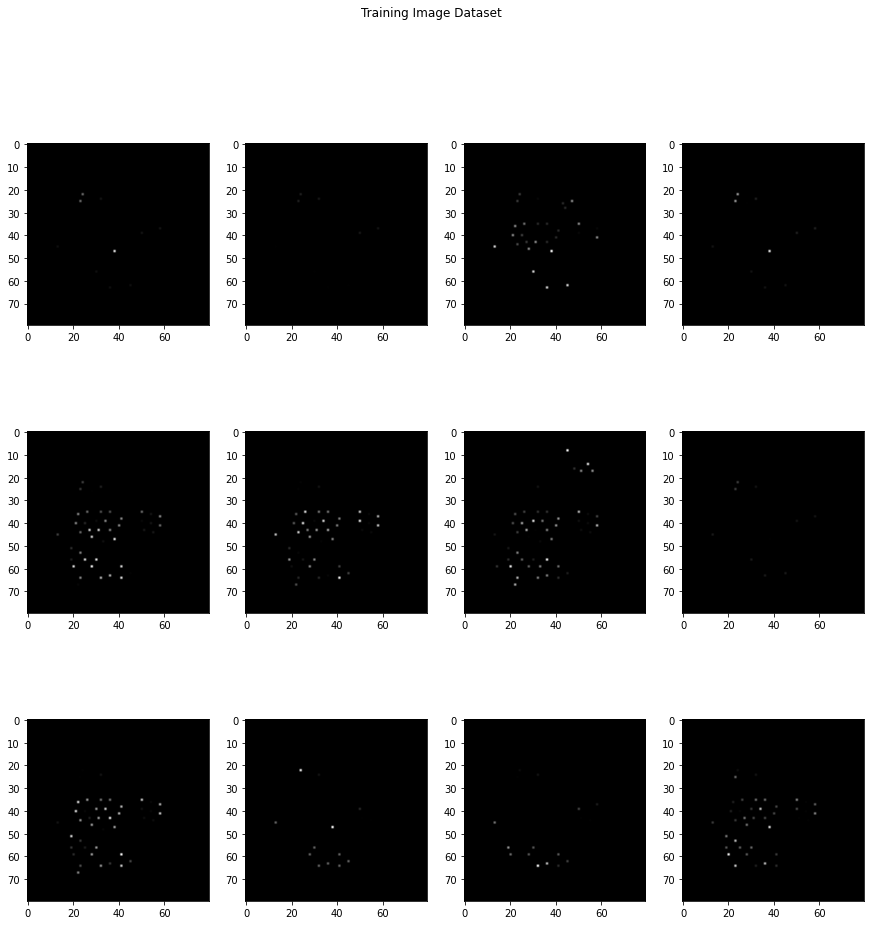

In [37]:
img_size = (15,15)
img=plt.figure(figsize=img_size)
img.suptitle("Training Image Dataset", fontsize=12)
for i in range(12):
  plt.subplot(3,4,i+1)
  img_shape= img_train[i].shape
  img_index=np.random.randint(img_train.shape[0])
  plt.imshow(img_train[img_index].astype(np.uint8))

plt.show()

# CNN Model

In [34]:
cnn5mod=Sequential([
    #1st CNN Layer
    Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding = 'valid', activation = 'relu', input_shape=(80,80,3)),
    MaxPooling2D(pool_size=(2,2)),
    #2nd CNN Layer
    Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    #3rd CNN Layer
    Conv2D(filters=32, kernel_size=(1,1), strides=(1,1), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    #4th CNN Layer
    Conv2D(filters=64, kernel_size=(1,1), strides=(1,1), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    #5th CNN Layer
    Conv2D(filters=128, kernel_size=(1,1), strides=(1,1), padding = 'valid', activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256,activation = 'relu'),
    #Op Layer
    Dense(5, activation= 'softmax')
])
cnn5mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
cnn5mod.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 80, 80, 16)        64        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 40, 40, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 40, 40, 16)        272       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 20, 20, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 20, 20, 32)        544       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 10, 32)      

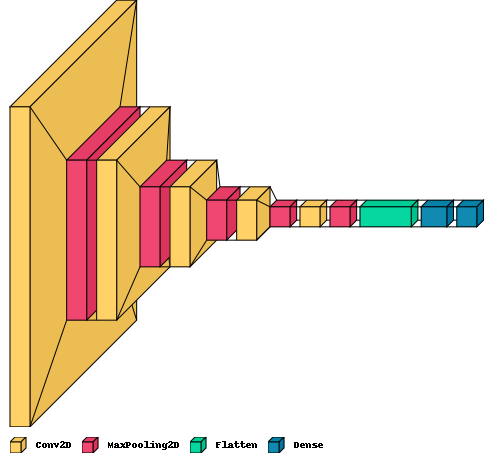

In [35]:
font = ImageFont.load_default()
visualkeras.layered_view(cnn5mod, legend=True, font=font, to_file='cnn5mod_visual_archtecture.png')

In [39]:
history = cnn5mod.fit(img_train, labl_train, batch_size =32, epochs= 50, validation_split=0.2)

Epoch 1/50
146/146 [==============================] - 1s 10ms/step - loss: 0.9362 - accuracy: 0.6733 - val_loss: 0.9201 - val_accuracy: 0.6295
Epoch 2/50
146/146 [==============================] - 1s 8ms/step - loss: 0.9415 - accuracy: 0.6752 - val_loss: 1.1063 - val_accuracy: 0.6732
Epoch 3/50
146/146 [==============================] - 1s 7ms/step - loss: 0.9519 - accuracy: 0.6705 - val_loss: 0.9862 - val_accuracy: 0.6295
Epoch 4/50
146/146 [==============================] - 1s 7ms/step - loss: 0.9327 - accuracy: 0.6731 - val_loss: 0.9438 - val_accuracy: 0.6295
Epoch 5/50
146/146 [==============================] - 1s 7ms/step - loss: 0.9569 - accuracy: 0.6690 - val_loss: 1.1167 - val_accuracy: 0.6732
Epoch 6/50
146/146 [==============================] - 1s 7ms/step - loss: 0.9438 - accuracy: 0.6740 - val_loss: 0.9667 - val_accuracy: 0.6295
Epoch 7/50
146/146 [==============================] - 1s 8ms/step - loss: 0.9320 - accuracy: 0.6699 - val_loss: 0.9720 - val_accuracy: 0.6732
Epoch

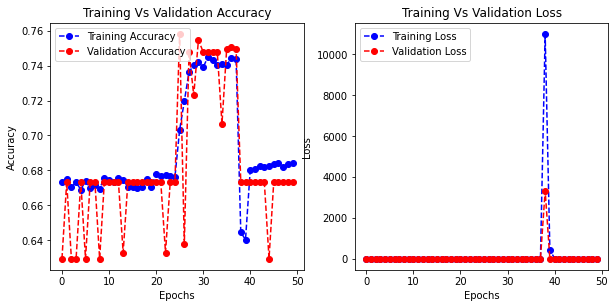

In [40]:
train_acc=history.history['accuracy']
train_loss=history.history['loss']

test_acc=history.history['val_accuracy']
test_loss=history.history['val_loss']

plt.figure(figsize=(10,10))
#Plotting Accuracy 
plt.subplot(2,2,1)
plt.plot(train_acc,'bo--', label='Training Accuracy')
plt.plot(test_acc, 'ro--',label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('Training Vs Validation Accuracy')

#Plotting Loss Function
plt.subplot(2,2,2) 
plt.plot(train_loss,'bo--', label='Training Loss')
plt.plot(test_loss, 'ro--',label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.title('Training Vs Validation Loss')
plt.show()

In [41]:
eval_model = cnn5mod.evaluate(img_test, labl_test)

46/46 [==============================] - 0s 4ms/step - loss: 1.5387 - accuracy: 0.3610


In [42]:
#Model Prediction on test dataset
labl_names = {'Benign':0, 'Bot':1, 'SSH-Bruteforce':2, 'FTP-BruteForce':3, 'Infilteration':4}
labl_true = np.argmax(labl_test, axis=1)
labl_pred = np.argmax(cnn5mod.predict(img_test), axis=-1)
print("CNN Five Classification Report:\n", classification_report(labl_true,labl_pred, target_names= labl_names))

46/46 [==============================] - 0s 3ms/step
CNN Classification Report:
                 precision    recall  f1-score   support

        Benign       0.61      0.53      0.57       997
           Bot       0.00      0.00      0.00       186
SSH-Bruteforce       0.00      0.00      0.00       108
FTP-BruteForce       0.00      0.00      0.00       120
 Infilteration       0.00      0.00      0.00        46

      accuracy                           0.36      1457
     macro avg       0.12      0.11      0.11      1457
  weighted avg       0.42      0.36      0.39      1457



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'Actual')

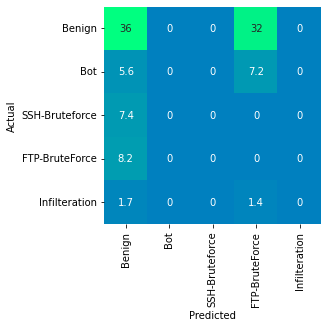

In [43]:
cm = confusion_matrix(labl_true, labl_pred)
cm_precent = (cm/np.sum(cm))*100
sns.heatmap(cm_precent, cmap = 'winter', center=0, square=True, annot=True, xticklabels=labl_names, yticklabels=labl_names, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")